In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
plt.style.use('default')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'] != 'g989']
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].nunique()

248

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = clean_data.groupby(['Drug Regimen'])
mean = drug_regimen['Tumor Volume (mm3)'].mean()
median = drug_regimen['Tumor Volume (mm3)'].median()
variance = drug_regimen['Tumor Volume (mm3)'].var()
std_dvn = drug_regimen['Tumor Volume (mm3)'].std()
dr_sem = drug_regimen['Tumor Volume (mm3)'].sem()

drug_regimen_summary_df = pd.DataFrame({"Mean": mean,
                                "Median": median,
                                "Variance": variance,
                                "Standard Deviation": std_dvn,
                                "SEM": dr_sem})

drug_regimen_summary_df.round(2)


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [7]:
# Generate the summary statistics table using the .agg function
drug_regimen_summary2= clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_regimen_summary2.round(2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


(0.0, 240.0)

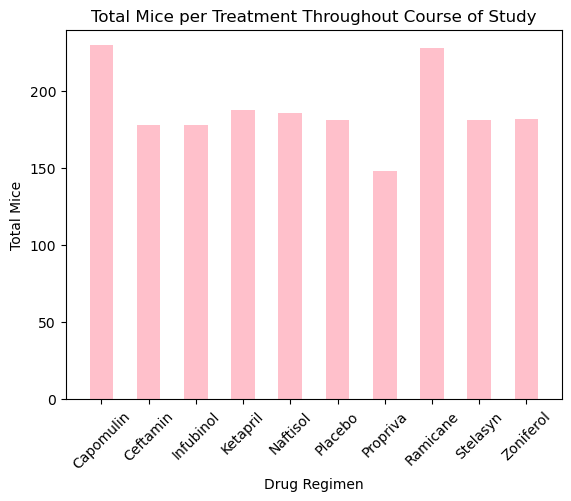

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice = drug_regimen['Mouse ID'].count()
total_mice

total_mice_df = pd.DataFrame({"Total Mice": total_mice})
total_mice_plot = total_mice_df.plot.bar(rot=45, ylabel='Total Mice', color='pink', title='Total Mice per Treatment Throughout Course of Study', legend=None)
plt.xlim(-0.75, len(total_mice.index)-0.25)
plt.ylim(0, max(total_mice)+10)

(0.0, 240.0)

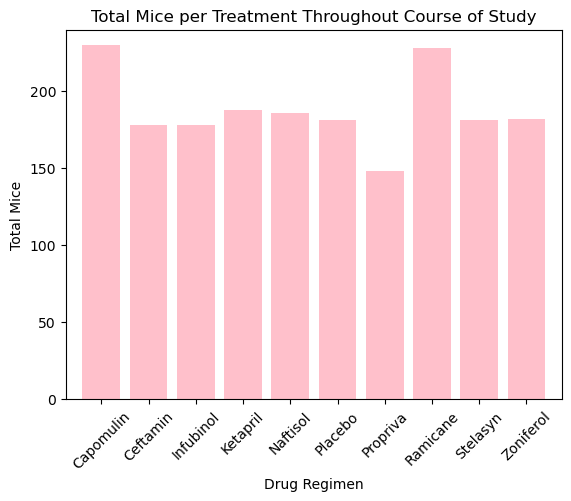

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(total_mice.index, total_mice.values, color='pink')
plt.title('Total Mice per Treatment Throughout Course of Study')
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")
plt.xticks(rotation=45)
plt.xlim(-0.75, len(total_mice.index)-0.25)
plt.ylim(0, max(total_mice)+10)

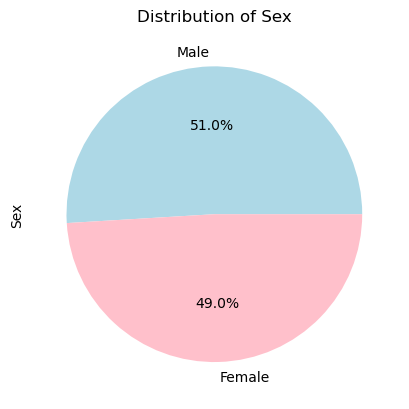

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_data['Sex'].value_counts()
colors = ["lightblue", "pink"]

gender_pie = gender_count.plot.pie(title='Distribution of Sex', autopct="%1.1f%%", colors=colors);


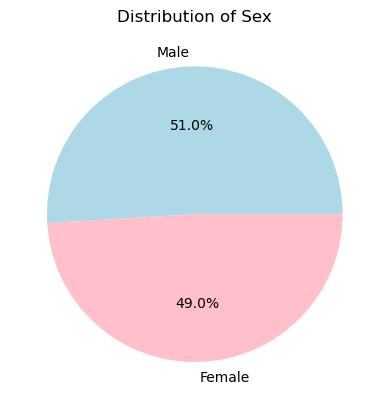

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count, autopct="%1.1f%%", colors=colors, labels=['Male', 'Female']);
plt.title('Distribution of Sex');


In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = pd.DataFrame(clean_data.groupby(['Mouse ID'])['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_data, max_tp_df, left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'], how='inner')
# Filter only data for Capomulin, Ramicane, Infubinol, and Ceftamin treatments
filtered = merged_df.loc[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
filtered

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
234,x822,Ceftamin,Male,3,29,45,61.386660,3
236,y163,Infubinol,Female,17,27,45,67.685569,3
240,y769,Ceftamin,Female,6,27,45,68.594745,4
241,y865,Ceftamin,Male,23,26,45,64.729837,3


In [13]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []


    
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    volume = filtered['Tumor Volume (mm3)'].loc[filtered['Drug Regimen'] == drug]
    tumor_volume.append(volume)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"{drug}")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The IQR for {drug} is {iqr}")
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"\n")

Capomulin
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The IQR for Capomulin is 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


Ramicane
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The IQR for Ramicane is 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


Infubinol
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The IQR for Infubinol is 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


Ceftamin
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The IQR for Ceftamin is 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.




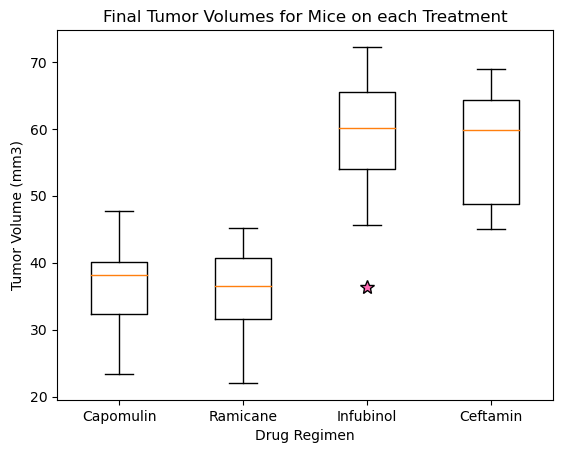

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
pink_star = dict(markerfacecolor='hotpink', marker='*', markersize='10')

plt.boxplot(tumor_volume, flierprops=pink_star);
plt.title('Final Tumor Volumes for Mice on each Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']);

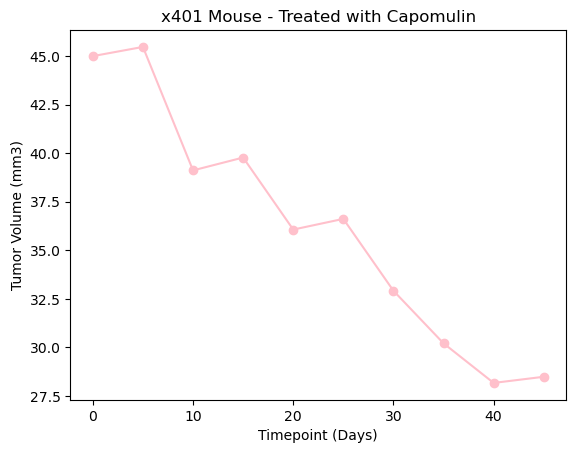

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

#Filter to select data for one Mouse ID
x401 = capomulin.loc[capomulin['Mouse ID'] == 'x401']
x401

# The timepoint vs tumor volume
plt.plot(x401["Timepoint"], x401["Tumor Volume (mm3)"], marker='o', color='pink');
plt.title("x401 Mouse - Treated with Capomulin")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)");

In [16]:
capomulin.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


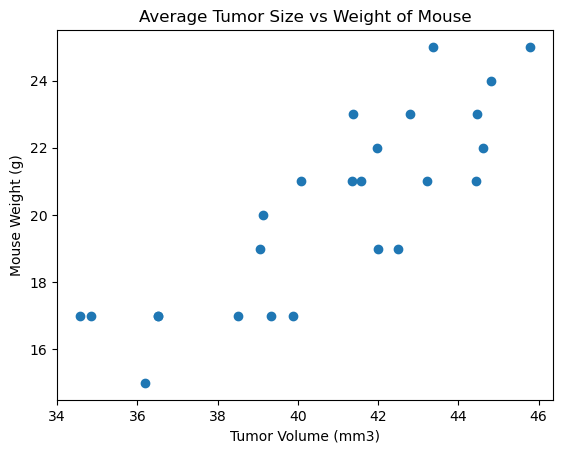

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# The averages of average tumor volume for each mouse
capomulin_averages = capomulin.groupby(["Mouse ID"]).mean()

# The average tumor volume against mouse weight
plt.scatter(capomulin_averages["Tumor Volume (mm3)"], capomulin_averages["Weight (g)"]);
plt.title("Average Tumor Size vs Weight of Mouse")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)");

In [18]:
# Calculate the correlation coefficient and linear regression model 


correlation = st.pearsonr(capomulin_averages["Tumor Volume (mm3)"], capomulin_averages["Weight (g)"])
print(f"The correlation between tumor volume and mouse weight is {round(correlation[0],2)}")

The correlation between tumor volume and mouse weight is 0.84


y = 0.74x + -10.15


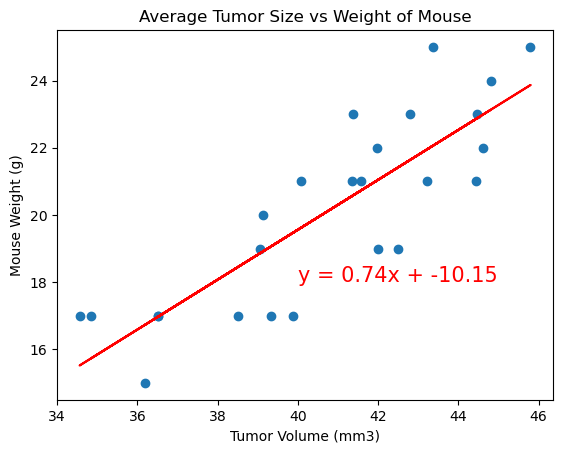

In [19]:
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_averages["Tumor Volume (mm3)"]
y_values = capomulin_averages["Weight (g)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

#Reprint the scatter plot with linear regression and line equation shown
plt.scatter(x_values, y_values);
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,18),fontsize=15,color="red")
plt.title("Average Tumor Size vs Weight of Mouse")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)");